Graph loaded from 'event_attendee_graph.gexf'
Number of nodes: 998
Number of edges: 153344
Detected 3 communities.


C:\Users\felix\AppData\Local\Temp\ipykernel_22068\3432318773.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))


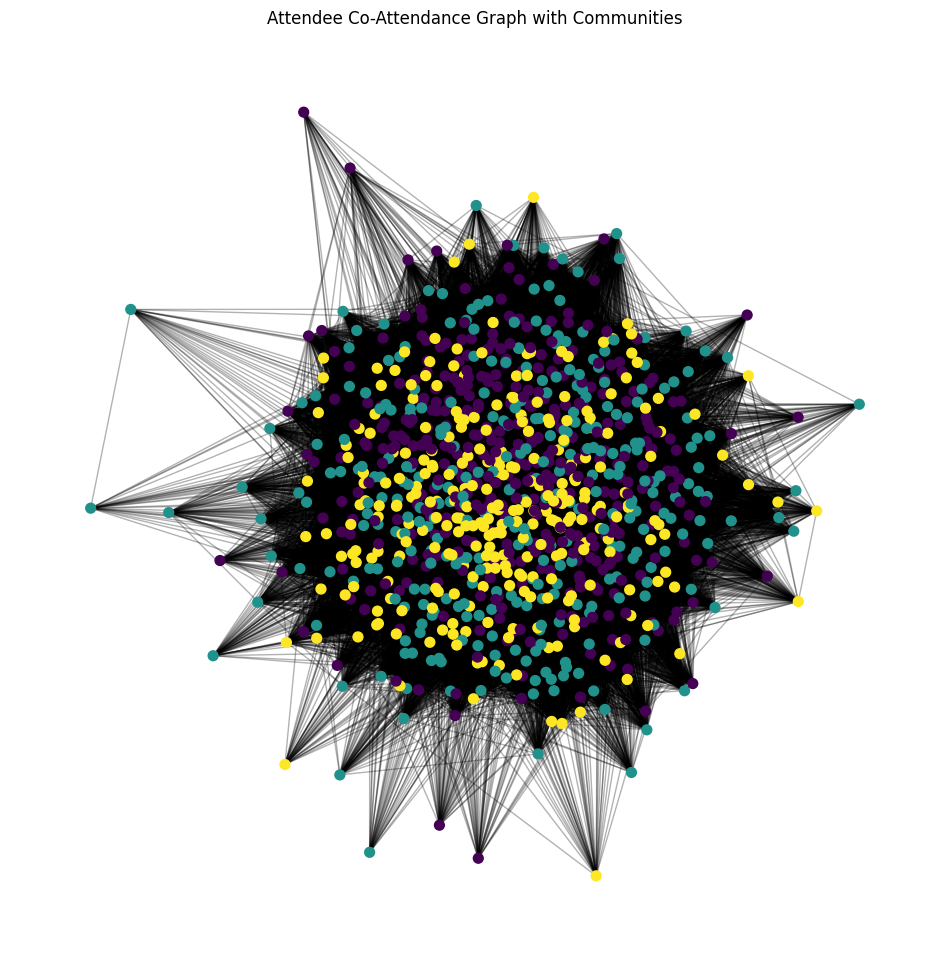

In [2]:
import networkx as nx
import random
import pandas as pd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from networkx.algorithms import community

# Load the graph from the GEXF file
G = nx.read_gexf("event_attendee_graph.gexf")

# Print basic information about the loaded graph
print("Graph loaded from 'event_attendee_graph.gexf'")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


# -----------------------------
# Step 3: Detect Communities
# -----------------------------
# Use the greedy modularity algorithm to detect communities.
communities = list(community.greedy_modularity_communities(G, weight='weight'))
print(f"Detected {len(communities)} communities.")

# Create a mapping from node to its community index.
node_community = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_community[node] = i

# -----------------------------
# Step 4: Visualize the Graph with Communities
# -----------------------------
# Use a colormap to assign a unique color for each community.
cmap = plt.cm.get_cmap('viridis', len(communities))
node_colors = [cmap(node_community[node]) for node in G.nodes()]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Attendee Co-Attendance Graph with Communities")
plt.axis('off')
plt.show()

C:\Users\felix\AppData\Local\Temp\ipykernel_22068\905923594.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', num_communities)


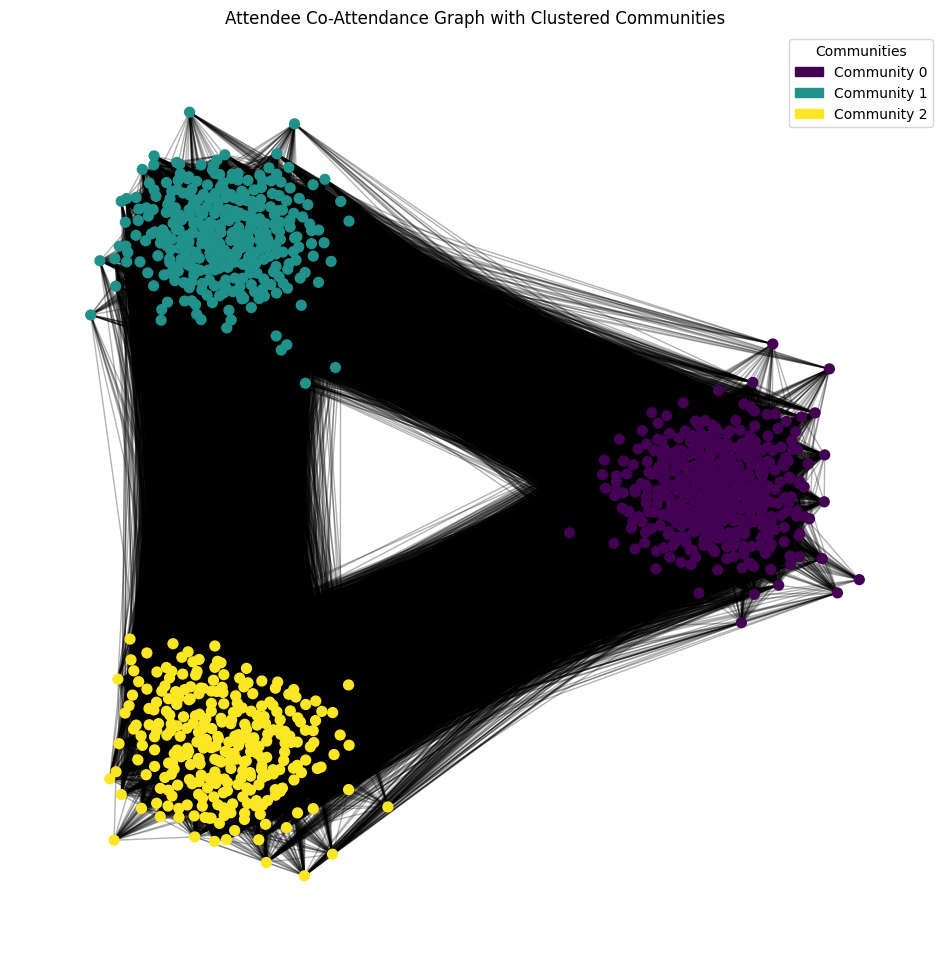

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import matplotlib.patches as mpatches
import numpy as np

# -------------------------------
# Step 3: Compute Community-Based Layout
# -------------------------------
# We'll compute a spring layout for each community separately and then shift them to visually separate clusters.
community_positions = {}
num_communities = len(communities)
radius = 2.0  # Adjust this value to control the separation between communities

for i, comm in enumerate(communities):
    subgraph = G.subgraph(comm)
    # Compute spring layout for the subgraph (only nodes in this community)
    pos_sub = nx.spring_layout(subgraph, k=0.15, iterations=20)
    
    # Calculate an offset for this community based on its index, arranged in a circle
    theta = 2 * np.pi * i / num_communities
    offset = (radius * np.cos(theta), radius * np.sin(theta))
    
    # Shift positions for nodes in this community by the offset
    for node, pos in pos_sub.items():
        community_positions[node] = (pos[0] + offset[0], pos[1] + offset[1])

# -------------------------------
# Step 4: Visualize the Graph with Community Clusters
# -------------------------------
# Set up a colormap so that each community has a unique color.
cmap = plt.cm.get_cmap('viridis', num_communities)
node_colors = [cmap(node_community[node]) for node in G.nodes()]

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, community_positions, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, community_positions, alpha=0.3)

# Create legend handles to clearly indicate community colors.
handles = []
for i in range(num_communities):
    patch = mpatches.Patch(color=cmap(i), label=f'Community {i}')
    handles.append(patch)
plt.legend(handles=handles, title="Communities", loc='best')

plt.title("Attendee Co-Attendance Graph with Clustered Communities")
plt.axis('off')
plt.show()

In [6]:
from networkx.algorithms.community import girvan_newman
import matplotlib.cm as cm

# -------------------------------
# Step 2: Detect Communities using Girvan-Newman
# -------------------------------
# The Girvan–Newman algorithm generates a sequence of partitions (communities)
communities_generator = girvan_newman(G)

# For example, iterate until we have at least 5 communities.
desired_communities = 5
for communities in communities_generator:
    if len(communities) >= desired_communities:
        break

# Convert communities to a sorted tuple of sets
communities = tuple(sorted(c) for c in communities)
print(f"Detected {len(communities)} communities.")

# Create a mapping from each node to its community index.
node_community = {}
for idx, comm in enumerate(communities):
    for node in comm:
        node_community[node] = idx

# -------------------------------
# Step 3: Identify Bridges
# -------------------------------
# In graph theory, a bridge is an edge whose removal increases the number of connected components.
bridges = list(nx.bridges(G))
print("Bridges found:", bridges)

# -------------------------------
# Step 4: Visualize the Graph with Communities and Bridges
# -------------------------------
# Compute a spring layout for the entire graph.
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Prepare node colors based on community membership using a colormap.
num_communities = len(communities)
cmap = cm.get_cmap('viridis', num_communities)
node_colors = [cmap(node_community[node]) for node in G.nodes()]

plt.figure(figsize=(12, 12))

# Draw nodes colored by community.
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)

# Separate edges into bridges and non-bridges.
bridge_edges = set(bridges)
non_bridge_edges = [edge for edge in G.edges() if edge not in bridge_edges and (edge[1], edge[0]) not in bridge_edges]

# Draw non-bridge edges in gray.
nx.draw_networkx_edges(G, pos, edgelist=non_bridge_edges, alpha=0.5, edge_color='gray')
# Draw bridge edges in red with a thicker width.
nx.draw_networkx_edges(G, pos, edgelist=bridge_edges, edge_color='red', width=2)

plt.title("Attendee Co-Attendance Graph\n(Girvan-Newman Communities and Bridges Highlighted)")
plt.axis('off')
plt.show()


KeyboardInterrupt: 